In [1]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

In [2]:
'''importing data and setting the scaler'''

scaler = MinMaxScaler()

data = pd.read_csv('../data/anonymized_data.csv')
labels = data.iloc[:,-1]
data = data.iloc[:,:-1]

In [3]:
'''data transformation'''

data = scaler.fit_transform(data)

In [4]:
# we can choose to have much deeper network with gradual decrease in number of hidden layer count

n_input = 30 
n_hidden = 2
n_output = n_input

learn_rate = 0.01

In [5]:
# DNN architecture

x = tf.placeholder(tf.float32, shape=[None, n_input])
hidden = fully_connected(x,n_hidden,activation_fn=None)
output = fully_connected(hidden,n_output,activation_fn=None)

In [6]:
# Optimization

loss = tf.reduce_mean(tf.square(output-x))
optimize = tf.train.AdamOptimizer(learn_rate)
train = optimize.minimize(loss)

In [7]:
# Training

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for i in range(1000):
        sess.run(train, feed_dict ={x:data})
        
    output2d = hidden.eval(feed_dict={x:data})

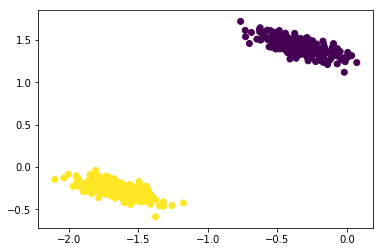

In [9]:
''' Data Visualization '''

plt.scatter(output2d[:,0], output2d[:,1], c = labels)